# Compensation Notebook

Hi! Welcome :) This code was created by Marilena and documented by Annabelle.
The goal of this script is to create composite plots like this one: 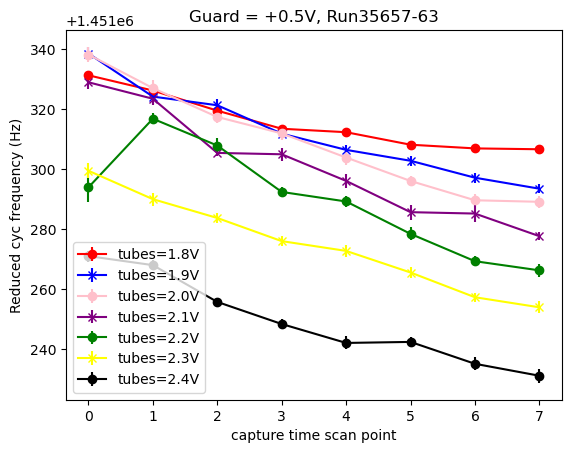
Make a copy and try with your own data! Need a hand? Please forward your questions to aczihaly@triumf.ca

#### import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

#### define various plotting functions

In [3]:
def gaussian(x, a, b, c, d):
    return -a*np.exp(-(x-b)**2/(2*c**2))+d

def line(x,a,b):
    return a*x+b

def parabola(x,a,b,c):
    return a*(x-b)**2+c

#### define tof_resonance which needs 4 inputs: a dataframe, center frequency, deviation, npoints

In [4]:
def tof_res(df,fc, dev, npoints): 

    ToF = []
    counts = []
    err_ToF = []
    x = []
    sigma = []
    
    for i in range(0, max(df['x_step_idx'])+1): # for i in range 0 to the max value in x_step_idx col (inclusive)
        
        df_i = df.loc[df['x_step_idx']==i] # df_i is a new dataframe that has all rows where the value in df['x_step_idx'] is equal to i
        
        ToF.append(np.average(df_i['tof']))
        err_ToF.append(np.std(df_i['tof'])/np.sqrt(len(df))) 
        sigma.append(np.std(df_i['tof']))
        x.append(fc-dev+i*((dev*2)/(npoints))) 
        counts.append(len(df_i['tof']))
        
    return ToF, counts, err_ToF, x, sigma

#### define fit_ref 

In [5]:
def fit_ref(f, fc, dev, npoints, p0, tof): # fits resonance for different capture times and outputs center frequency and error
    
    centre_freq = []
    err_center_freq = []
    ystep = []
    
    # if fitting multiple resonances, have range start at 0
    # if fitting a single resonance, have range start at -1
    
    '''for i in range(0,max(f['y_step_idx'])+1): 
        df0 = f.loc[f['y_step_idx']==i]
        df = df0.loc[df0['tof']<=tof]'''
    
    for i in range(0, max(f['y_step_idx'])+1): 
        df0 = f.loc[f['y_step_idx']==i]
        df = df0.loc[df0['tof']<=tof]
        
        ToF, counts, err_ToF, x, sigma = tof_res(df, fc, dev, npoints)
        ystep.append(i)
        
        popt, pcov = curve_fit(gaussian, x, ToF, p0, bounds = ([p0[0]-10, p0[1]-60,p0[2]-5,p0[3]-20],[p0[0]+10, p0[1]+60,p0[2]+5,p0[3]+20]))
        a,b,c,d = popt
        perr = np.sqrt(np.diag(pcov))
        print(popt)
        centre_freq.append(popt[1])
        err_center_freq.append(perr[1])
        plt.figure()
    
        plt.errorbar(x, ToF, err_ToF, label = 'Scan'+str(i))
        plt.plot(x, gaussian(x,a,b,c,d))
        plt.plot(x, gaussian(np.array(x),int(p0[0]),int(p0[1]),int(p0[2]),int(p0[3])))
        plt.legend()
        plt.xlabel('Dipole or Quadrupole Frequency (Hz)')
        plt.ylabel('ToF (us)')
        
    return centre_freq, err_center_freq, ystep

[7.83840526e+00 1.45133122e+06 7.99999988e+00 9.72937564e+01]
[8.05177497e+00 1.45132615e+06 8.00000000e+00 9.80224081e+01]
[8.43143952e+00 1.45131943e+06 7.99999995e+00 9.83939736e+01]
[8.66446235e+00 1.45131340e+06 6.76121156e+00 9.92169204e+01]
[8.77488104e+00 1.45131224e+06 8.00000000e+00 1.00438638e+02]
[1.02043379e+01 1.45130807e+06 7.99999991e+00 1.01429135e+02]
[1.12117567e+01 1.45130684e+06 7.99999996e+00 1.01976015e+02]
[8.94000364e+00 1.45130655e+06 7.99999918e+00 1.00530261e+02]


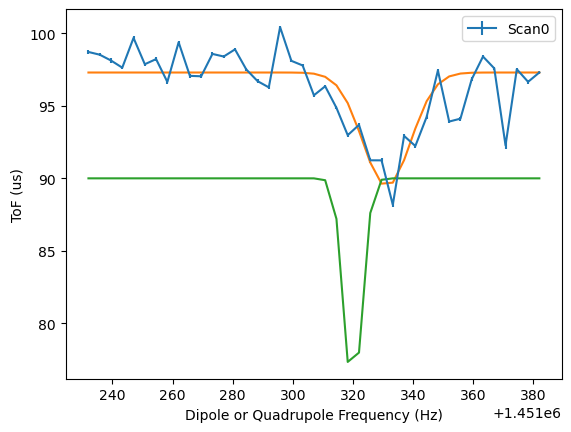

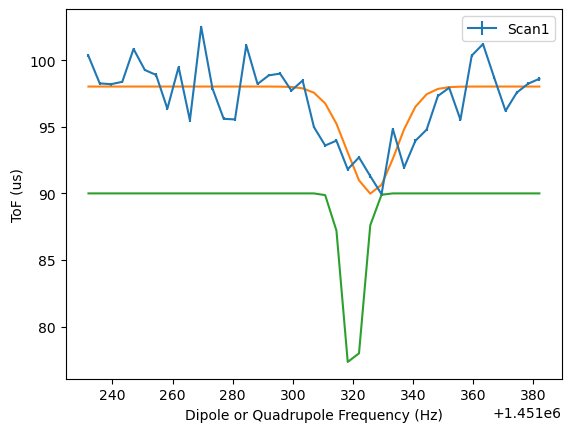

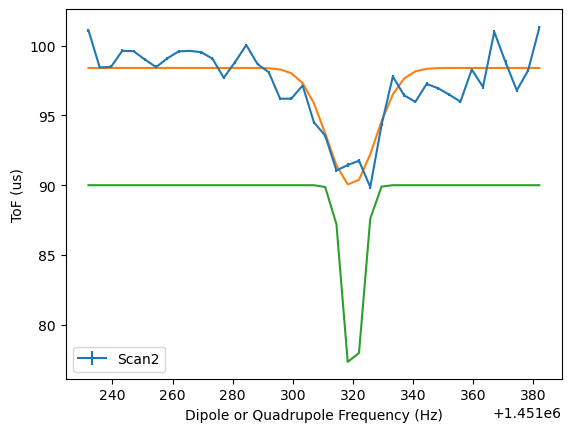

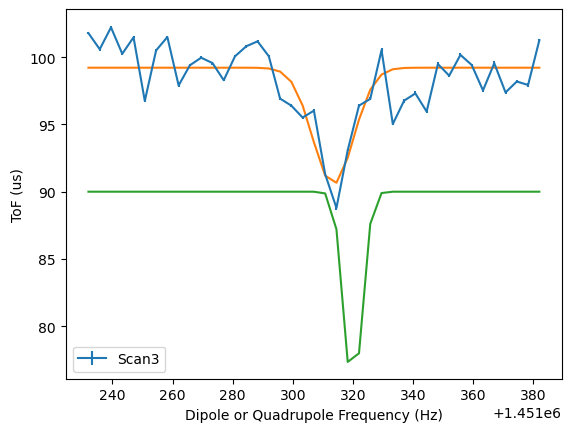

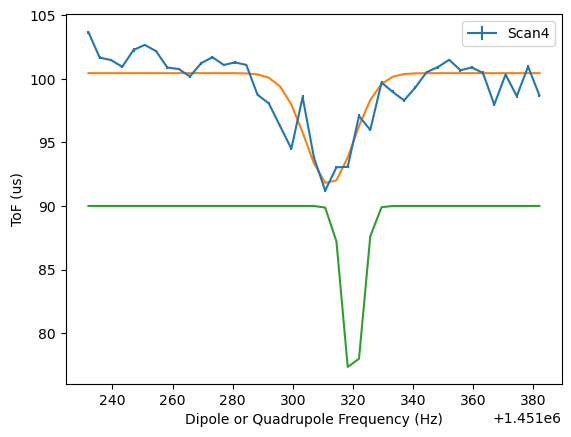

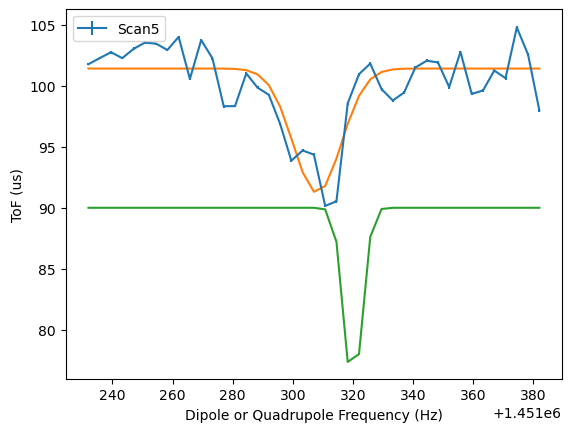

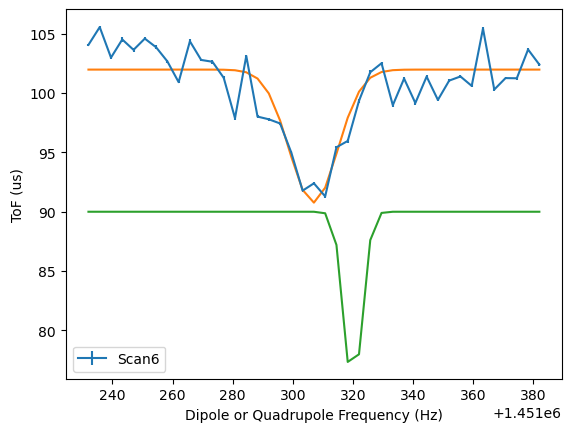

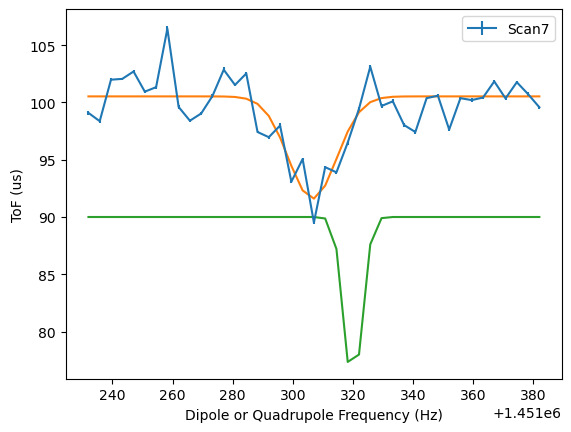

In [6]:
f01 = pd.read_csv("run35657.csv") 
f1 = f01.loc[f01['tof']<=200]

# fit_ref(data frame, center frequency, deviation, npoints, [amplitude, frequency, sigma, average tof], tof cut)

centre_freq1, err_center_freq1, ystep1 = fit_ref(f1, 1451307, 75, 40, [15, 1451320, 3, 90], 200) 

# green line is your guess fit
# orange line is your fit
# blue is your data

# once fit is completed, adjust [] parameters to optimize fits 

[6.03605288e+00 1.45133849e+06 1.50000000e+01 9.47446407e+01]
[5.11417494e+00 1.45132412e+06 1.49401024e+01 9.58879682e+01]
[6.69151002e+00 1.45132123e+06 1.49999486e+01 9.61951005e+01]
[7.15022217e+00 1.45131177e+06 9.37989975e+00 9.65722725e+01]
[6.39373558e+00 1.45130635e+06 1.16584375e+01 9.71415557e+01]
[5.48919224e+00 1.45130271e+06 9.74854795e+00 9.62012788e+01]
[6.69256919e+00 1.45129707e+06 1.04944812e+01 9.78504962e+01]
[5.96382927e+00 1.45129340e+06 8.19108260e+00 9.79453301e+01]


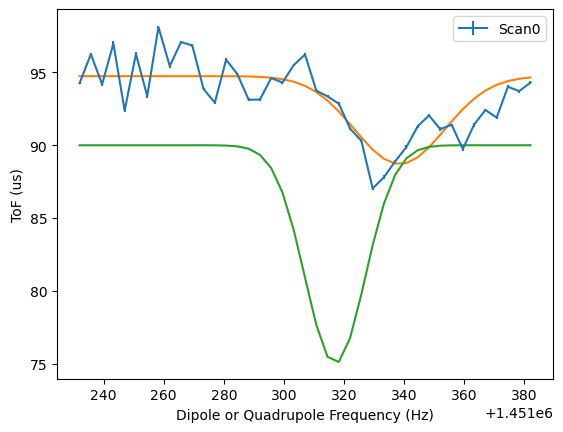

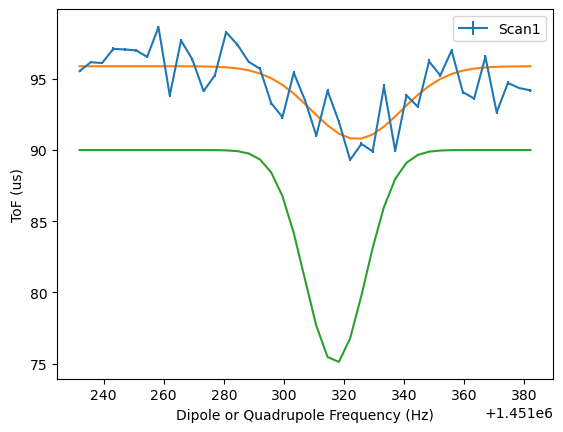

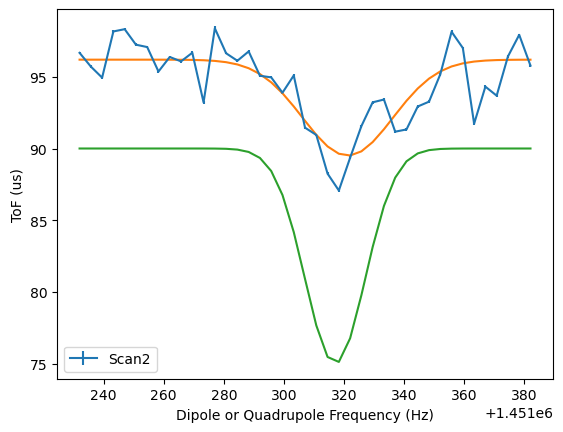

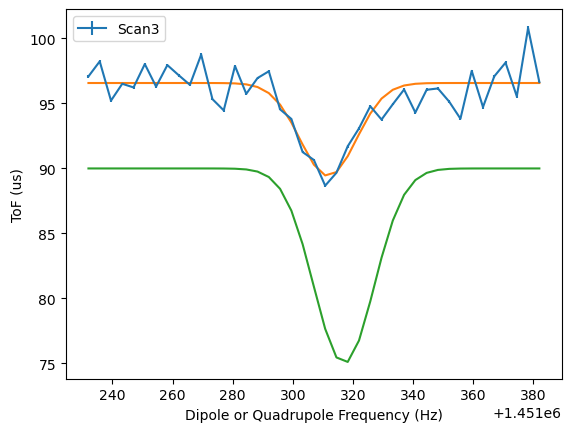

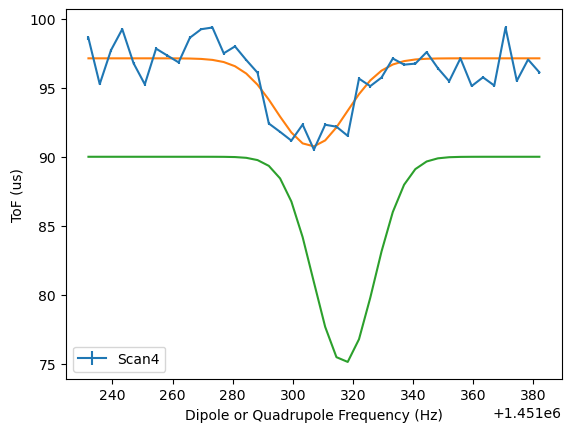

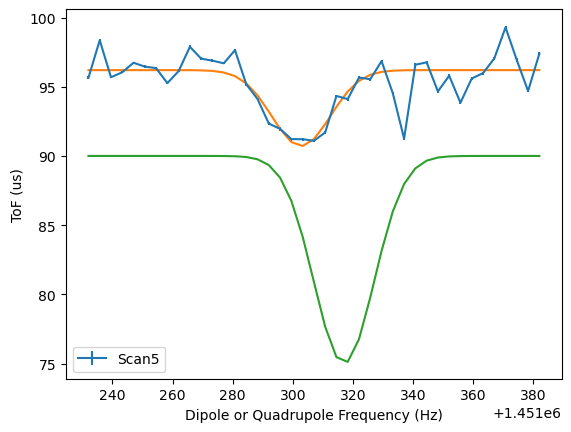

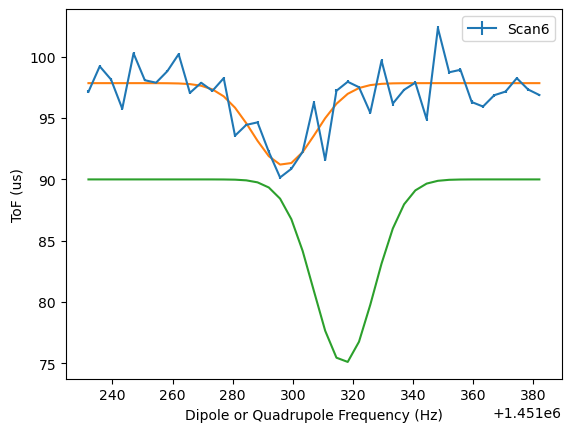

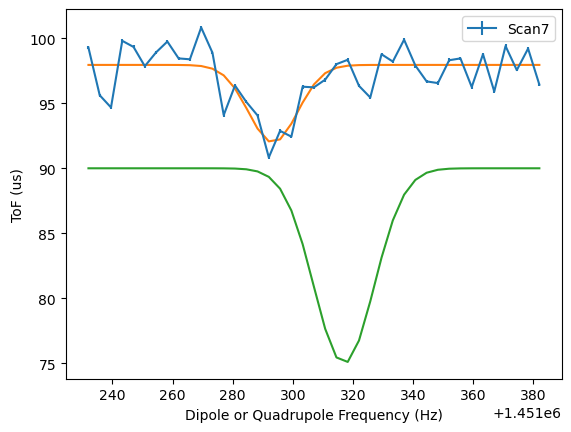

In [7]:
f02 = pd.read_csv("run35658.csv") 
f2 = f02.loc[f02['tof']<=200]

centre_freq2, err_center_freq2, ystep2 = fit_ref(f2, 1451307, 75, 40, [15, 1451317, 10,90], 200) 

#### plotting time! 

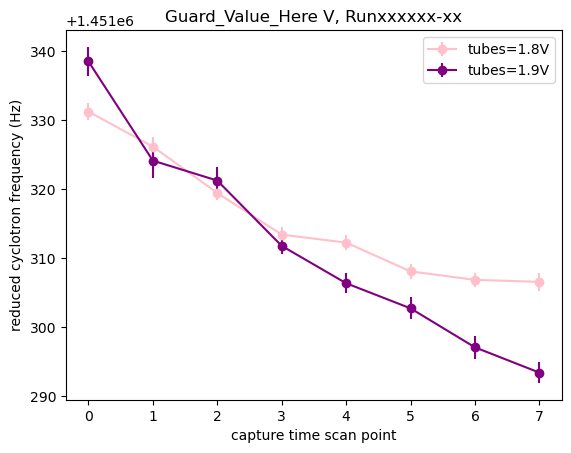

In [8]:
plt.errorbar(ystep1, centre_freq1, err_center_freq1, marker = 'o', color='pink',label='tubes=1.8V')
plt.errorbar(ystep2, centre_freq2, err_center_freq2, marker = 'o', color='purple',label='tubes=1.9V')

plt.xlabel('capture time scan point')
plt.ylabel('reduced cyclotron frequency (Hz)')
plt.title('Guard_Value_Here V, Runxxxxxx-xx')
plt.legend()

plt.savefig('compensation_scan_guard_value_here_runxxxxxx-xx.png', dpi = 100)